In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.linear_model
import seaborn as sb
import statsmodels.api as sm
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


In [49]:
#Read file
search = pd.read_csv('Search data.csv')
display = pd.read_csv('display data.csv')
video = pd.read_csv('video data.csv')

In [20]:
# def createTimeSeriesComponent(data):
#     data['Date'] = pd.to_datetime(data['Date'])
#     data.set_index('Date', inplace=True)
#     data['Year'] = data.index.year
#     data['Month'] = data.index.month

In [21]:
# createTimeSeriesComponent(search)
# createTimeSeriesComponent(display)
# createTimeSeriesComponent(video)

In [22]:
def ExploratoryAnalysis(data):
    print "first 5 rows: \n" + str(data.head(5)) + "\n\n"
    print "statistical summary of data: \n\n" + str(data.describe()) + "\n\n"
    print "correlation: \n\n" + str(data.corr()) +"\n\n"
    columns = data.columns
    for i in range(0,len(columns)):
        print "columns " + str(columns[i]) + " has distinct values: \n" + str((data[columns[i]].value_counts())) + "\n\n"
    
    print "Pivot table: \n" +    str(pd.pivot_table(data, index = 'Month', aggfunc = np.sum)) + '\n\n'
    print "Graph: number of clicks distributed by Month \n" +  str(sb.factorplot( x='Month', y='Clicks', data=data, kind='bar', estimator = sum)) + "\n\n"
    print "Graph: spend distributed by Month \n" +  str(sb.factorplot( x='Month', y='Cost', data=data, kind='bar', estimator = sum)) + "\n\n"

first 5 rows: 
         Date  Month   Device  Channel Campaign Type Media Type  Region  \
0  2013-06-16      6   Tablet  Youtube         Reach      Video  Global   
1  2013-06-27      6  Desktop  Youtube         Reach      Video  Global   
2  2013-06-27      6   Mobile  Youtube         Reach      Video  Global   
3  2013-06-28      6  Desktop  Youtube         Reach      Video  Global   
4  2013-06-28      6   Mobile  Youtube         Reach      Video  Global   

  Targeting     Cost  Clicks  
0     Reach     0.20       2  
1     Reach    16.84      14  
2     Reach  1407.02     660  
3     Reach   973.28    1046  
4     Reach  2600.04     568  


statistical summary of data: 

             Month         Cost       Clicks
count  1644.000000  1644.000000  1644.000000
mean      7.214112   179.711861    55.930657
std       2.943021   554.098341   164.277759
min       1.000000     0.000000     2.000000
25%       5.000000    11.355000     4.000000
50%       7.000000    30.330000    12.000000


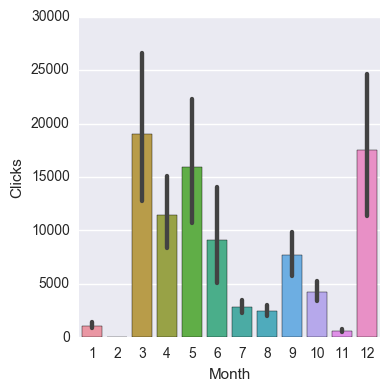

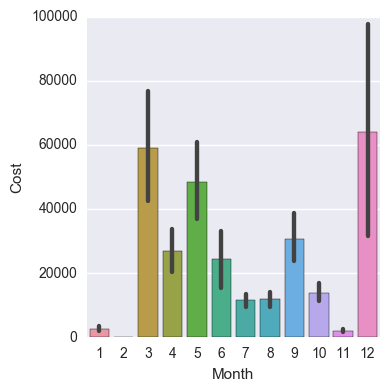

In [23]:

ExploratoryAnalysis(video)

In [24]:
# def createDummiesVariables(data):    
#     data = data.join(pd.get_dummies(data['Device'],prefix="Device"))
#     data = data.join(pd.get_dummies(data['Targeting'],prefix="Targeting"))
#     data = data.join(pd.get_dummies(data['Region'],prefix="Region"))
#     data = data.join(pd.get_dummies(data['Channel'],prefix="Channel"))
#     data = data.join(pd.get_dummies(data['Campaign Type'],prefix="Campaign Type"))
#     data = data.join(pd.get_dummies(data['Month'],prefix="Month"))  
#     return data

In [50]:
    display = display.join(pd.get_dummies(display['Device'],prefix="Device"))
    display = display.join(pd.get_dummies(display['Targeting'],prefix="Targeting"))
    display = display.join(pd.get_dummies(display['Region'],prefix="Region"))
    display = display.join(pd.get_dummies(display['Channel'],prefix="Channel"))
    display = display.join(pd.get_dummies(display['Campaign Type'],prefix="Campaign Type"))
    display = display.join(pd.get_dummies(display['Month'],prefix="Month"))

In [51]:
    video = video.join(pd.get_dummies(video['Device'],prefix="Device"))
    video = video.join(pd.get_dummies(video['Targeting'],prefix="Targeting"))
    video = video.join(pd.get_dummies(video['Region'],prefix="Region"))
    video = video.join(pd.get_dummies(video['Channel'],prefix="Channel"))
    video = video.join(pd.get_dummies(video['Campaign Type'],prefix="Campaign Type"))
    video = video.join(pd.get_dummies(video['Month'],prefix="Month"))

In [52]:
    search = search.join(pd.get_dummies(search['Device'],prefix="Device"))
    search = search.join(pd.get_dummies(search['Targeting'],prefix="Targeting"))
    search = search.join(pd.get_dummies(search['Region'],prefix="Region"))
    search = search.join(pd.get_dummies(search['Channel'],prefix="Channel"))
    search = search.join(pd.get_dummies(search['Campaign Type'],prefix="Campaign Type"))
    search = search.join(pd.get_dummies(search['Month'],prefix="Month"))

In [32]:

def LinearRegressionResult(data):
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = data["Clicks"]
    
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())

In [33]:
def LinearRegression(data):
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = data["Clicks"]
    lm = linear_model.LinearRegression()
    lm.fit(X, y)
    predicted = lm.predict(X)
    print "r^2:", lm.score(X, y) 

In [34]:
LinearRegressionResult(video)

                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     272.1
Date:                Tue, 22 Nov 2016   Prob (F-statistic):               0.00
Time:                        20:16:29   Log-Likelihood:                -9510.1
No. Observations:                1644   AIC:                         1.906e+04
Df Residuals:                    1623   BIC:                         1.918e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Cost                  

In [16]:
LinearRegression(display)

r^2: 0.175282408486


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

def DecisionTree(data):
#     data['Cost'] = np.log(data["Cost"])
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = np.log(data["Clicks"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    print 'MSE: ' + str(metrics.mean_squared_error(y_test,dt.predict(X_test)))
    print 'accuracy = ' + str(dt.score(X_test,y_test))
    feature_importances_array = dt.feature_importances_

    # Put the features themselves in a list
    features_array = X.columns.values 

    # Turn these into a Data Frame
    feature_importances_df = pd.DataFrame({'importances' : feature_importances_array, 'features' : features_array})
    
    print feature_importances_df.sort(columns='importances', ascending=False)
    

In [60]:
DecisionTree(display)

MSE: 0.368800050713
accuracy = 0.906689844367
                             features  importances
0                                Cost     0.780766
6                     Targeting_Reach     0.066731
2                       Device_Mobile     0.017869
22        Campaign Type_Reach - Image     0.015792
14                       Region_LATAM     0.011175
28                            Month_1     0.010656
1                      Device_Desktop     0.010354
13                      Region_Global     0.007217
23         Campaign Type_Reach - Text     0.006883
29                            Month_2     0.006665
39                           Month_12     0.005896
21                Campaign Type_Reach     0.004329
8                          Region_AMS     0.004229
11                        Region_EMEA     0.003960
18            Campaign Type_In-Market     0.003811
9                         Region_APAC     0.003629
24          Campaign Type_Remarketing     0.003453
19               Campaign Type_Legac

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


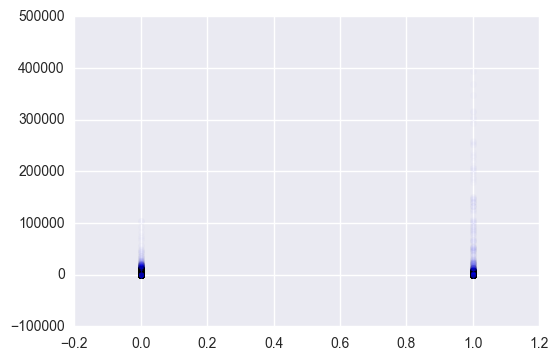

In [42]:
plt.scatter(display.Device_Mobile, display.Clicks, alpha=0.01)

SW: Looks like the feature 'Device_Mobile" is indeed pretty important in predicting number of clicks!

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def RandomForrest(data):
#     data['Cost'] = np.log(data["Cost"])
    X = data.drop(['Month','Clicks','Device','Date','Campaign Type','Media Type','Region','Targeting','Channel'],axis =1 )
    y = np.log(data["Clicks"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
#     data['predict_clicks'] = rf.predict(X_test)
    
    feature_importances_array = rf.feature_importances_

    # Put the features themselves in a list
    features_array = X.columns.values 

    # Turn these into a Data Frame
    feature_importances_df = pd.DataFrame({'importances' : feature_importances_array, 'features' : features_array})
    
    print rf.score(X_test,y_test)
    print feature_importances_df.sort(columns='importances', ascending=False)

SW: Hey Ng, I would log-transform Clicks to see if you get a more realistic model. In about 45% of your cases, clicks is 0, and you have a few extremely large values here.

SW: Overall, it is possible that your random forest model is this good. I would look at the predictions on some individual cases to see the predictions your model is returning "make sense".

In [39]:
RandomForrest(display)

0.942184019274
                             features  importances
0                                Cost     0.779682
6                     Targeting_Reach     0.066709
2                       Device_Mobile     0.018393
22        Campaign Type_Reach - Image     0.014811
28                            Month_1     0.011437
14                       Region_LATAM     0.010192
1                      Device_Desktop     0.009455
29                            Month_2     0.007260
13                      Region_Global     0.006795
21                Campaign Type_Reach     0.006437
39                           Month_12     0.005967
23         Campaign Type_Reach - Text     0.004878
8                          Region_AMS     0.004616
11                        Region_EMEA     0.004602
19               Campaign Type_Legacy     0.004134
18            Campaign Type_In-Market     0.003657
30                            Month_3     0.003374
9                         Region_APAC     0.003351
3               

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [47]:
display.head()

,Date,Month,Device,Channel,Campaign Type,Media Type,Region,Targeting,Cost,Clicks,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,predict_clicks
0,1/1/2013,1,Desktop,Google,Remarketing,Display,Global,Remarketing,1074.74,3752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3356.8
1,1/1/2013,1,Mobile,Google,Reach,Display,Global,Reach,845.78,1050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1016.4
2,1/1/2013,1,Tablet,Google,Reach,Display,Global,Reach,420.80,350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,374.8
3,1/2/2013,1,Mobile,Google,Reach,Display,EMEA,Reach,88.40,136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0
4,1/2/2013,1,Tablet,Google,Remarketing,Display,Global,Remarketing,17.06,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.4


In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(display.Clicks, display.predict_clicks)

ValueError: Can't handle mix of multiclass and continuous

SW: "Accuracy score" only works if the two arguments are categorical rather than continuous. I think you want something like "mean_squared_error" or "R squared" here - we went over how to do these in class 6, I believe.

SW: Keep up the great work, Ng!